In [1]:
import networkx as nx

test = True

def import_graph(filename):

    with open(filename) as f:
        input = f.read().splitlines()
    input = [line.split(" ") for line in input]
    adj = dict([(line[0][:3], tuple(line[1:])) for line in input])

    return adj

5

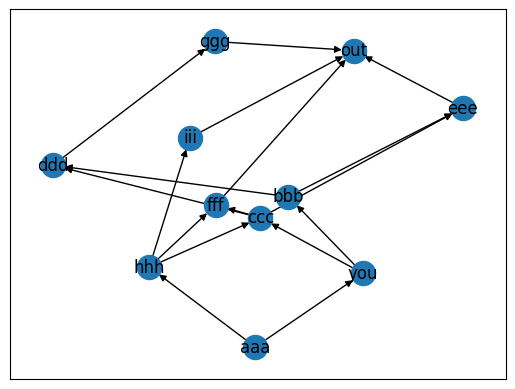

In [2]:
# 1:

if test:
    filename = "11_test_1.txt"
else:
    filename = "11_input.txt"

graph = nx.DiGraph()
adj = import_graph(filename)
edges = [(u,v) for u, nbrs in adj.items() for v in nbrs]
graph.update(edges=edges, nodes=adj)

if test:
    nx.draw_networkx(graph)

len(list(nx.all_simple_paths(graph, source="you", target="out")))

In [3]:
# 2:

if test:
    adj = import_graph("11_test_2.txt")

nodes_map = {}
for i, node in enumerate(adj.keys()):
    nodes_map[node] = i
nodes_map["out"] = i+1
adj_onehot = {}
for node, nbrs in adj.items():
    adj_onehot[nodes_map[node]] = tuple([nodes_map[nb] for nb in nbrs])
adj_onehot[nodes_map["out"]] = ()

In [4]:
def dfs(u, dest, adj, memo):
    
    if u == dest:
        return 1
    

    if memo[u] != -1:
        return memo[u]
    
    count = 0
    for v in adj[u]:
        count += dfs(v, dest, adj, memo)
    
    memo[u] = count
    return count

In [5]:
svr = nodes_map["svr"]
fft = nodes_map["fft"]
dac = nodes_map["dac"]
out = nodes_map["out"]

V = len(adj_onehot)

In [6]:
# first svr >> fft >> dac >> out
paths_svr_fft = dfs(svr, fft, adj_onehot, [-1]*V)
paths_fft_dac = dfs(fft, dac, adj_onehot, [-1]*V)
paths_dac_out = dfs(dac, out, adj_onehot, [-1]*V)
n1 = paths_svr_fft * paths_fft_dac * paths_dac_out 

# scr >> dac >> fft >> out
paths_svr_dac = dfs(svr, dac, adj_onehot, [-1]*V)
paths_dac_fft = dfs(dac, fft, adj_onehot, [-1]*V)
paths_fft_out = dfs(fft, out, adj_onehot, [-1]*V)
n2 = paths_svr_dac * paths_dac_fft * paths_fft_out

n1 + n2

2